### 농구선수의 게임 데이터를 활용한 포지션 예측을 위한 데이터 정제

### 문제 정의
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("../Data/basketball.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Player : 선수이름
- Pos : 포지션 (SG: Shooting Guard, C:Center)
- 3P : 한 경기당 평균 3점슛 성공 횟수
- 2P : 한 경기당 평균 2점슛 성공 횟수
- TRB : 한 경기당 평균 리바운드 성공 횟수
- AST : 한 경기당 평균 어시스트 성공 횟수
- STL : 한 경기당 평균 스틸 성공 횟수
- BLK : 한 경기당 평균 블로킹 성공 횟수

In [19]:
# 포지션 종류 파악
df['Pos'].unique()

array(['SG', 'C'], dtype=object)

In [20]:
# 포지션별 갯수 파악
df.Pos.value_counts()
# R의 table 같음

SG    50
C     50
Name: Pos, dtype: int64

### 포지션 별 내용
- C : 골대, 포스트 근처에서 슛을 블로킹하고 리바운드하며 바깥으로 쳐내며 골대 근처에서 2점슛으로 득점을 한다.  
- SG : 코트내에서 3점슛 등 장거리에서 슛을 해서 점수를 얻는 역할 

---
### 데이터 시각화
데이터의 특징을 바탕으로 한 공간에서 시각화 함으로써 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분

In [21]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
from matplotlib import pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 스틸, 2점슛 데이터 시각화

In [22]:
import seaborn as sns

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


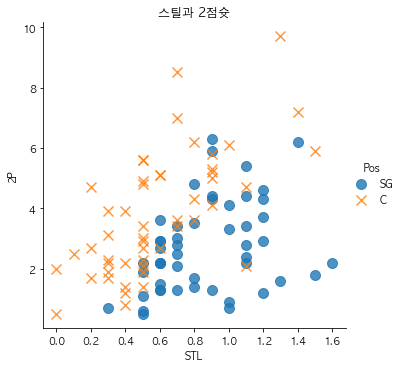

In [25]:
sns.lmplot(
    'STL',
    '2P',
    data = df,
    fit_reg = False,
    markers=['o','x'],
    scatter_kws = {'s': 100}, # 좌표상의 점의 크기
    hue = 'Pos' # 대상값
)
plt.title('스틸과 2점슛')
plt.show()

### 어시스트와 2점슛 데이터 시각화

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


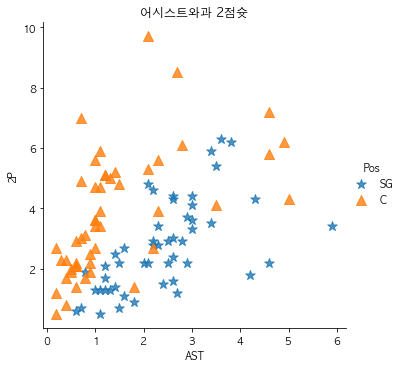

In [28]:
sns.lmplot(
    'AST',
    '2P',
    data = df,
    fit_reg = False,
    markers=['*','^'],
    scatter_kws = {'s': 100}, # 좌표상의 점의 크기
    hue = 'Pos' # 대상값
)
plt.title('어시스트와 2점슛')
plt.show()

> 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의
> 경계가 너무 근접해서 분류하기에 모호하다.

In [ ]:
### 블로킹과 3점슛 시각화

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


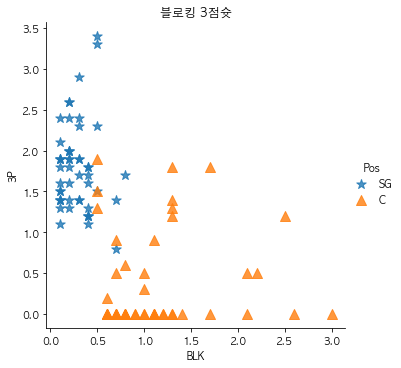

In [30]:

sns.lmplot(
    'BLK',
    '3P',
    data = df,
    fit_reg = False,
    markers=['*','^'],
    scatter_kws = {'s': 100}, # 좌표상의 점의 크기
    hue = 'Pos' # 대상값
)
plt.title('블로킹 3점슛')
plt.show()

In [ ]:
### 리바운드와 3점슛 시각화

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


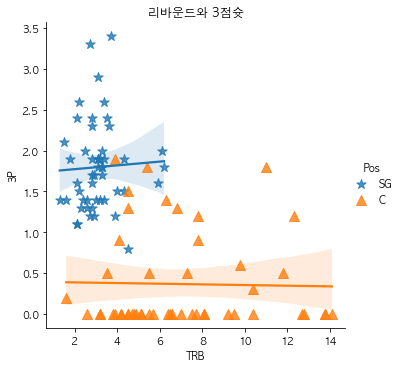

In [32]:
sns.lmplot(
    'TRB',
    '3P',
    data = df,
    fit_reg = True, # 회귀선을 볼수 있다.
    markers=['*','^'],
    scatter_kws = {'s': 100}, # 좌표상의 점의 크기
    hue = 'Pos' # 대상값
)
plt.title('리바운드와 3점슛')
plt.show()

> 동일한 분류끼라 서로 근접해 있고, 다른 분류와는 멀리 떨어져 있음
> 시각화한 결과에서 데이터의 구분이 확실할 경우 선책된 속성들이 머신러닝 정확도에 큰 도움을 준다.

---
# 데이터 다듬기
: 분별력이 없는 특징 (feature)을 데이터에서 제거
시각화를 통해 확인해 본 결과 2P,AST,STL은 분별력이 없다.

In [34]:
# 분별력인 없는 특징(feature)제거
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [36]:
df.drop(['2P','AST','STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [38]:
# 학습데이터와 검증데이터로 나누기
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 데스트 데이터로 분류합니다.
train,test = train_test_split(df, test_size=0.2) # 하나가지고 2개를 사용했음

In [39]:
train.shape

(80, 5)

In [40]:
test.shape

(20, 5)

In [41]:
# 데이터 저장하기
train.to_csv("../Data/basketball_train.csv", index=None)
test.to_csv("../Data/basketball_test.csv", index=False)